# World Heritage Sites

## Import Libraries

In [15]:
import pandas as pd
import numpy as  np
import  matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from matplotlib import rcParams
from matplotlib import font_manager
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

**Adding fonts to use**

  - Downoad custum fonts and place them in the project directory
  - Create  a path dir (as working directory)
  - Create a variable `font_files` and add fonts to it


In [14]:
#pwd()
font_dirs = ['/Users/birusod/Documents/DataScienceDocs/GitProjects/Projects2024/PyDocs/W06_WorldHeritage']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
#font_files

In [5]:
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

**Import Fonts**

In [12]:
#rcParams['font.family'] = 'Machine Gunk'
rcParams['font.family'] = 'Roboto'
rcParams['font.size'] = '12'


## Load date

In [9]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-02-06/heritage.csv"
df = pd.read_csv(url);
df

,country,2004,2022
0,Norway,5,8
1,Denmark,4,10
2,Sweden,13,15


In [10]:
df2  = pd.melt(df, id_vars=['country'], var_name='year', value_name='total')
df2

,country,year,total
0,Norway,2004,5
1,Denmark,2004,4
2,Sweden,2004,13
3,Norway,2022,8
4,Denmark,2022,10
5,Sweden,2022,15


## Viz

### Barplot

<Axes: xlabel='country'>

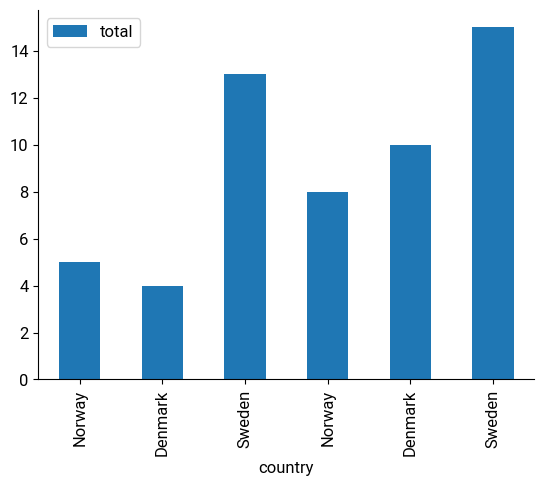

In [16]:
df2.set_index('country').plot.bar()

<Axes: xlabel='country'>

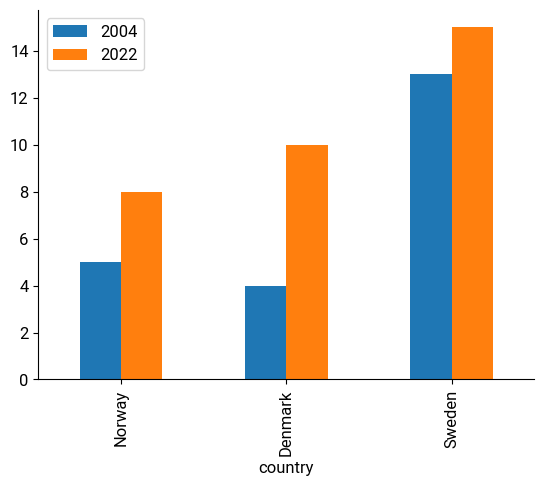

In [17]:
df.set_index('country').plot.bar()

<Axes: ylabel='country'>

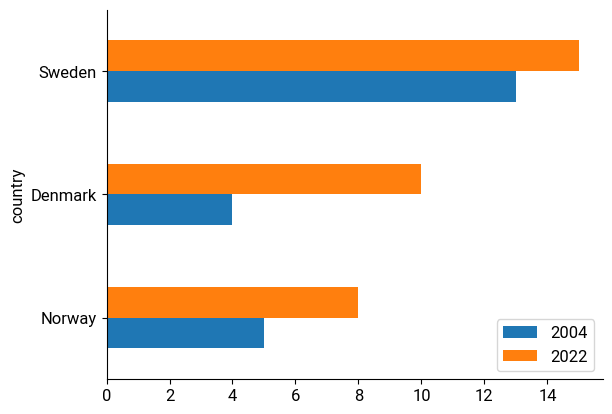

In [18]:
df.set_index('country').plot.barh()

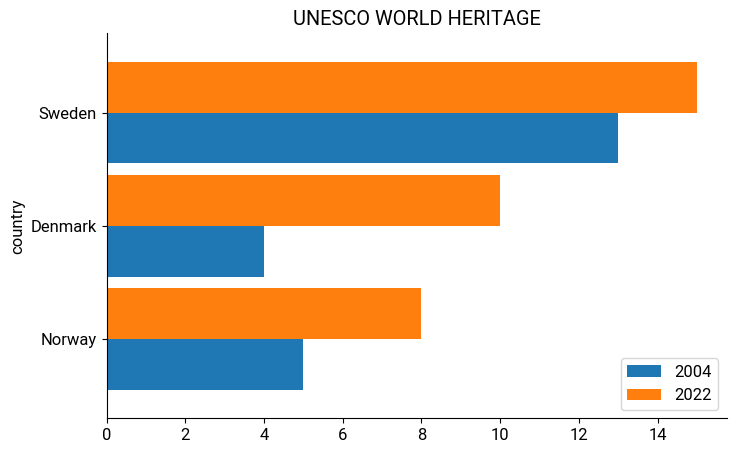

In [27]:
dd = df.set_index('country')

fig, ax = plt.subplots(figsize = (8, 5), dpi = 100)
dd.plot.barh(
    width = .9,
    ax = ax, 
    title  = 'UNESCO WORLD HERITAGE')

plt.show()

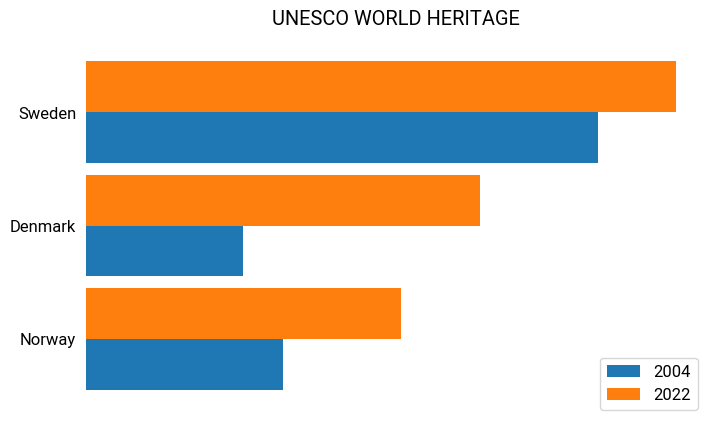

In [41]:
fig, ax = plt.subplots(figsize = (8, 5), dpi = 100)
bar_hztl =  dd.plot.barh(
    width = .9,
    ax = ax, 
    title  = 'UNESCO WORLD HERITAGE',
    ylabel=''
    )
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tick_params(bottom = False, left = False, labelbottom  = False) 



[Text(0, 0, '4,000'), Text(0, 0, '2,000'), Text(0, 0, '7,000')]

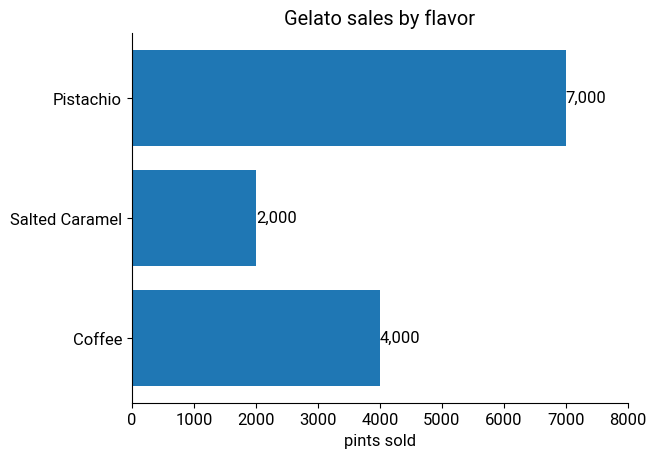

In [38]:
fruit_names = ['Coffee', 'Salted Caramel', 'Pistachio']
fruit_counts = [4000, 2000, 7000]

fig, ax = plt.subplots()
bar_container = ax.barh(fruit_names, fruit_counts)

ax.set(
    xlabel='pints sold', 
    title='Gelato sales by flavor', 
    xlim=(0, 8000))
ax.bar_label(bar_container, fmt='{:,.0f}')

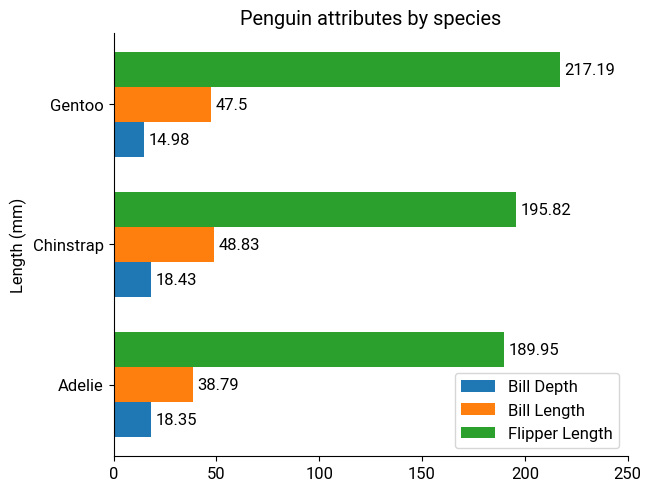

In [46]:
species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),}

y = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(y + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_yticks(y + width, species)
ax.legend(loc='lower right', ncols=1)
ax.set_xlim(0, 250)

plt.show()

In [59]:
dd.reset_index()

,country,2004,2022
0,Norway,5,8
1,Denmark,4,10
2,Sweden,13,15


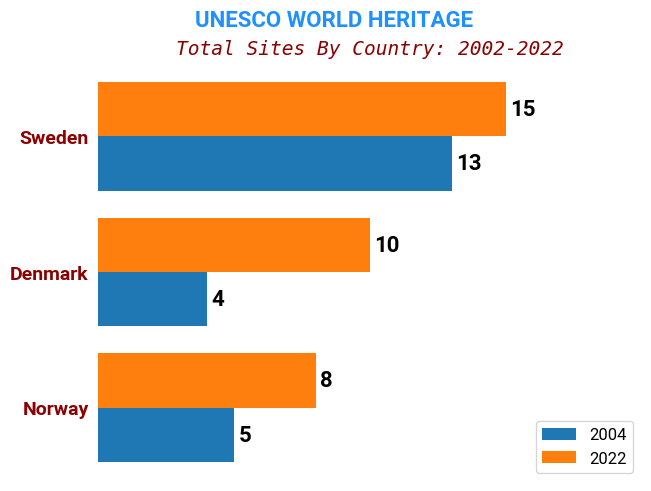

In [114]:
country = dd.reset_index().country
sites = {
    '2004': dd.reset_index()['2004'],
    '2022': dd.reset_index()['2022'],
    #'Flipper Length': (189.95, 195.82, 217.19),
    }

y = np.arange(len(country))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained')

mid = (fig.subplotpars.right + fig.subplotpars.left)/2

for attribute, measurement in sites.items():
    offset = width * multiplier
    rects = ax.barh(y + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, size=16, weight='bold')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.

plt.tick_params(bottom = False, left = False, labelbottom  = False) 
ax.set_yticks(y + width, country, fontdict  = {'color':'darkred', 'size':14, 'weight':'bold'})

ax.set_xlabel('')
ax.legend(loc='lower right', ncols=1)
ax.set_xlim(0, 20)

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.suptitle('UNESCO WORLD HERITAGE', size=16, x=mid, color = 'dodgerblue', weight='bold') # or fontweight

titlefont = {'family':'monospace', 'color':'darkred', 'size':14,}
ax.set_title(
    'Total Sites By Country: 2002-2022',
    fontdict  = titlefont,
    style='italic')
plt.show()

In [42]:
dd

,2004,2022
country,,
Norway,5,8
Denmark,4,10
Sweden,13,15
